In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


## Imputing null with random values for: Numerical Data

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])


In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [6]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [7]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [8]:
# lets see if each row has any null value present
X_train['Age_imputed'].isnull()

30     False
10     False
873    False
182    False
876    False
       ...  
534    False
584     True
493    False
527     True
168     True
Name: Age_imputed, Length: 712, dtype: bool

In [9]:
# Extracting the null values
X_train["Age_imputed"][X_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [23]:

# 1. Drop null data from duplicate X_train["Age"]. note: inplace = False
# 2. from the remaining non null values, take out a sample of total number of null values in the 
# original column
# 3. take the values as an array
X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).values

array([39.  , 51.  , 25.  , 36.  , 36.  ,  7.  , 43.  , 39.  , 36.  ,
       47.  , 25.  , 28.5 , 22.  ,  6.  , 36.  , 27.  , 47.  , 19.  ,
       24.  , 45.  , 24.  , 62.  , 25.  , 49.  , 36.  ,  4.  , 28.  ,
        2.  ,  1.  , 34.  , 19.  , 34.  , 33.  , 25.  , 57.  , 28.  ,
       30.  ,  2.  , 48.  , 33.  , 28.  , 20.  , 51.  , 21.  , 39.  ,
       41.  , 34.  , 61.  , 50.  , 32.5 , 25.  , 50.  , 47.  , 65.  ,
       25.  , 36.5 , 48.  , 24.  , 32.  , 42.  , 42.  ,  0.42, 41.  ,
       23.  , 54.  , 41.  , 16.  , 33.  , 40.  ,  4.  , 50.  , 29.  ,
       24.  , 20.  , 30.  , 35.  , 34.  , 53.  , 16.  , 21.  , 38.  ,
       23.  , 33.  , 18.  , 26.  ,  9.  , 33.  , 40.  , 27.  , 42.  ,
        4.  , 31.  , 30.  , 57.  , 32.  , 39.  , 26.  , 24.  , 25.  ,
       19.  , 61.  , 23.  , 31.  , 31.  , 47.  , 33.  , 40.5 , 25.  ,
       19.  , 32.  , 38.  , 24.  , 10.  , 29.  , 21.  , 25.  , 38.  ,
        4.  , 20.  , 50.  , 31.  ,  6.  , 19.  , 38.  , 18.  , 18.  ,
       27.  , 18.  ,

In [11]:
# replacing the null values in X_train["Age"] with random values
X_train["Age_imputed"][X_train['Age_imputed'].isnull()] = X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).values

/var/folders/xz/1pv049ms51d6d735fvm2v0r40000gn/T/ipykernel_8348/3061665586.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train["Age_imputed"][X_train['Age_imputed'].isnull()] = X_train["Age"].dropna().sample(X_train["Age"].isnull().s

In [12]:
X_train["Age_imputed"].isnull().sum()
# you can see ki X_train["Age_imputed"] has no null values

np.int64(0)

/var/folders/xz/1pv049ms51d6d735fvm2v0r40000gn/T/ipykernel_8348/1074323378.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
/var/folders/xz/1pv049ms51d6d735fvm2v0r40000gn/T/ipykernel_8348/1074323378.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

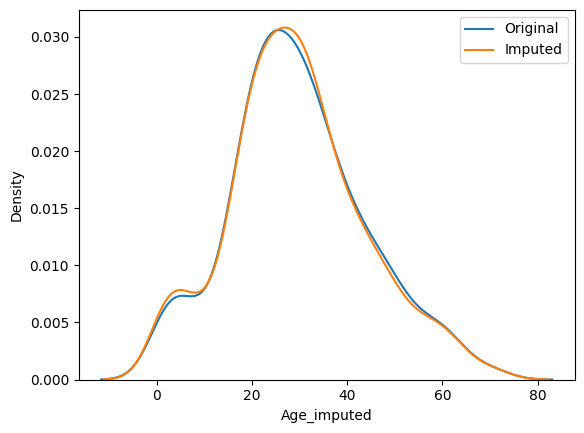

In [13]:
# comparing the density graph
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [14]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())
# we can see that the variance of both is almost close

Original variable variance:  204.34951339046142
Variance after random imputation:  204.45374185669812


In [15]:
# checking the covariance
X_train[['Fare', 'Age', 'Age_imputed']].cov()

# you can notice that there is a good change in covariance between Age and Age_imputed
# let's say that really small children( under 2 years ) did'nt mentioned their age and thus 
# they had missing values in their age column. but the fare for children still applied.
# But when we imputed the missing values with random numbers, we introduced noise. That's the reason
# that covariance between Fare and Age is higher than Fare and Age_Imputed

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,57.133980
Age,71.512440,204.349513,204.349513
Age_imputed,57.133980,204.349513,204.453742


<Axes: >

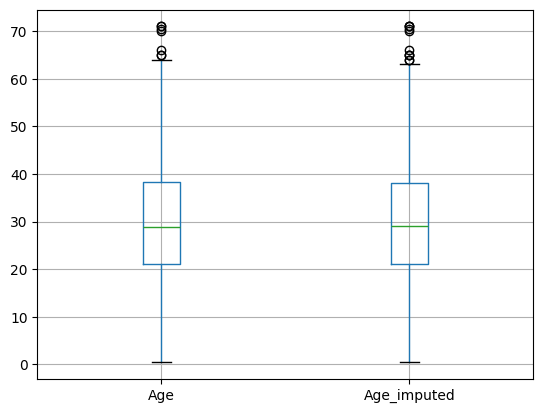

In [16]:

X_train[['Age', 'Age_imputed']].boxplot()
# we can notice that the number of outliers doesn't change as much!

## Imputing null values with random values: Categorical Data

In [25]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data.head()


,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [28]:
data.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [30]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [31]:
X = data
y = data['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [32]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [34]:
X_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd


In [35]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


/var/folders/xz/1pv049ms51d6d735fvm2v0r40000gn/T/ipykernel_8348/613679808.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_tra

In [37]:
X_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,Gd
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd


In [39]:
X_train["GarageQual_imputed"].isnull().sum(), X_train["FireplaceQu_imputed"].isnull().sum(), 

(np.int64(0), np.int64(0))

In [46]:
temp = pd.concat(
        [
            # ratio of each GarageQuality and imputed values with total number of non-null values
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [48]:
temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.037671
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [49]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.648709
TA,0.412439,0.539843
Fa,0.040917,0.053872
Po,0.027823,0.037037
Ex,0.024550,0.031425
